# Analysis 1

In [2]:
#In this analysis I calculate coeficients for price to see how different variables such as amenities and location effect the price

import pandas as pd
import numpy as np

listing=pd.read_csv("../finaldata/listings_all_clean.csv", encoding = "ISO-8859-1")

In [3]:
#Prices more than $600 looks unreasonable and probably fake for Airbnb
fitters = listing[listing['price'] <= 600].ix[:, listing.columns != 'city']


In [4]:
#calculating coeficients using sklearn library

from sklearn.linear_model import LinearRegression
clf = LinearRegression()


y = fitters['price']
clf.fit(fitters.drop('price', axis='columns'), y)
coefs = list(zip(clf.coef_, fitters.drop('price', axis='columns')))


In [5]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches



In [9]:
#save data to a csv
df = pd.DataFrame(coefs)
df.columns=['coef','amenities']

df.to_csv('coefs.csv')
df

,coef,amenities
0,-3.146769e-04,Unnamed: 0
1,8.377417e-03,host_listings_count
2,8.377417e-03,host_total_listings_count
3,1.922670e+01,accommodates
4,1.310228e+01,bathrooms
5,3.000473e+01,bedrooms
6,-7.785688e+00,beds
7,4.516449e+00,guests_included
8,-1.533369e-01,number_of_reviews
9,8.913818e-01,review_scores_rating


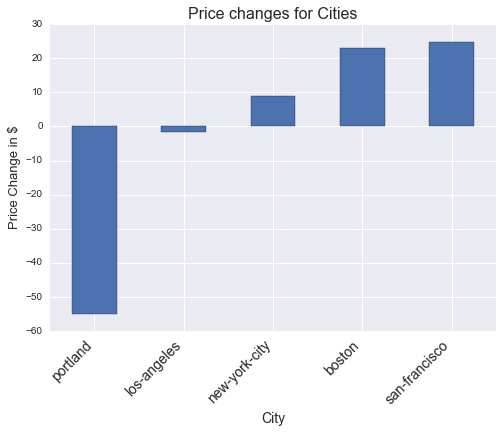

In [40]:
#effect of city on the price

cities = np.unique(listing['city'])
cities_effects = [v for v in coefs if v[1] in cities]

pd.Series(data=[n[0] for n in cities_effects],
          index=[n[1] for n in cities_effects]).sort_values().plot(kind='bar')

ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right',fontsize=14)

plt.xlabel('City',fontsize=14)
plt.ylabel('Price Change in $',fontsize=13)
plt.title('Price changes for Cities',fontsize=16)

plt.savefig('cities_coefs.png',bbox_inches='tight')
plt.show()



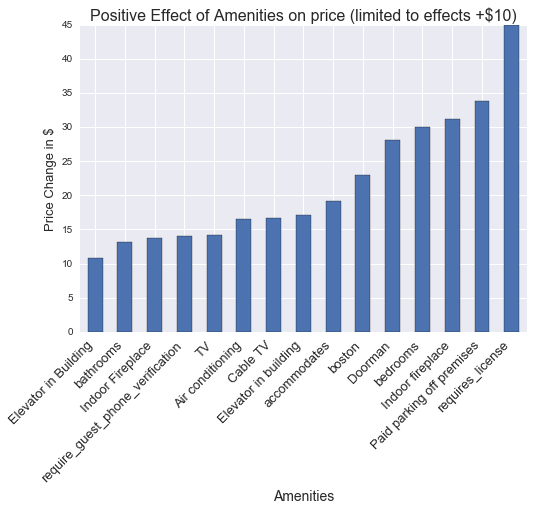

In [41]:
#positive effect of amenities on the price. 
amenity_effects = [v for v in coefs[1:-4] if v[0]>10  ]
pd.Series(data=[n[0] for n in amenity_effects],
          index=[n[1] for n in amenity_effects]).sort_values().plot(kind='bar')

ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right',fontsize=13)
plt.xlabel('Amenities',fontsize=14)
plt.ylabel('Price Change in $',fontsize=13)
plt.title('Positive Effect of Amenities on price (limited to effects +$10)',fontsize=16)
plt.savefig('positive_amenities_coefs.png',bbox_inches='tight')


plt.show()



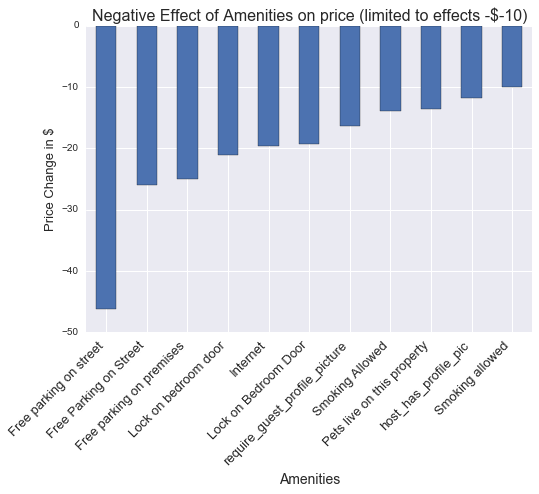

In [42]:
#negative effect of amenities on the price. 
amenity_effects = [v for v in coefs[1:-4] if v[0]<-10  ]
pd.Series(data=[n[0] for n in amenity_effects],
          index=[n[1] for n in amenity_effects]).sort_values().plot(kind='bar')

ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right',fontsize=13)
plt.xlabel('Amenities',fontsize=14)
plt.ylabel('Price Change in $',fontsize=13)
plt.title('Negative Effect of Amenities on price (limited to effects -$-10)',fontsize=16)
plt.savefig('negative_amenities_coefs.png',bbox_inches='tight')
plt.show()
